# Indian Liver Patient Dataset

The data and description of the Indian Liver Patient Dataset is available here:
https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

The data can be downloaded following this linkL
https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv

Data Set Information:

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Attribute Information:

1. Age Age of the patient
2. Gender Gender of the patient
3. TB Total Bilirubin
4. DB Direct Bilirubin
5. Alkphos Alkaline Phosphotase
6. Sgpt Alamine Aminotransferase
7. Sgot Aspartate Aminotransferase
8. TP Total Protiens
9. ALB Albumin
10. A/G Ratio Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts) 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
#from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#from sklearn.metrics import classification_report, confusion_matrix#, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn import datasets

#from metricPlots import *
#from MIA import *
from attack_scenarios import *

PROJECT_ROOT = os.path.dirname(os.path.dirname(os.path.abspath('.')))
sys.path.append(os.path.join(PROJECT_ROOT, 'data_preprocessing'))

from data_interface import get_data_sklearn

%matplotlib inline

INFO:C:\Users\simonr04\git\GRAIMatter\data_preprocessing\data_interface.py:ROOT PROJECT FOLDER = C:\Users\simonr04\git\GRAIMatter
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


# Load data

In [10]:
X, y = get_data_sklearn('indian liver')

INFO:C:\Users\simonr04\git\GRAIMatter\data_preprocessing\data_interface.py:DATASET FOLDER = C:\Users\simonr04\git\GRAIMatter\data


# Define and train the target Models


Split into 3 groups:
  - target_train, to train the target models
  - shadow_train, to train the Salem shadow model 1
  - test, to test all models

In [10]:
X_target_train, X_shadow_train, X_test, y_target_train, y_shadow_train, y_test = split_target_data(X, y)

In [11]:
classifiers = {
        'RandomForest':RandomForestClassifier(bootstrap=False), 
        'DecisionTree':DecisionTreeClassifier(),
        'GaussianProcess':GaussianProcessClassifier(),
        'MLP':MLPClassifier(),
        'KN':KNeighborsClassifier(),
        'SVM':SVC(kernel='rbf', probability=True)
}

In [12]:
trained_models = {}
for name,model in classifiers.items():
    trained_models[name] = model.fit(X_target_train, y_target_train) 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
model_metrics = {}

Model RandomForest
              precision    recall  f1-score   support

           1       0.79      0.85      0.82       107
           2       0.47      0.37      0.41        38

    accuracy                           0.72       145
   macro avg       0.63      0.61      0.62       145
weighted avg       0.71      0.72      0.71       145

Metrics
TPR 0.3684210526315789
FPR 0.14953271028037382
FAR 0.5333333333333333
TNR 0.8504672897196262
PPV 0.4666666666666667
NPV 0.7913043478260869
FNR 0.631578947368421
ACC 0.7241379310344828
Advantage 0.2188883423512051
PLR 2.463815789473684
NLR 0.7426257952573742
OR 3.3177083333333335
Normalized confusion matrix


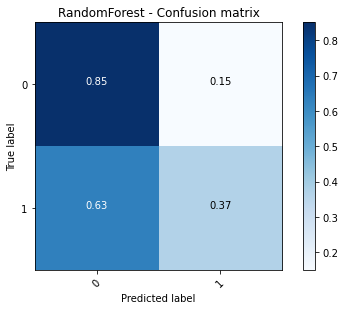

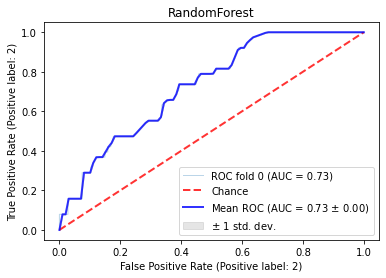

Model DecisionTree
              precision    recall  f1-score   support

           1       0.78      0.73      0.75       107
           2       0.36      0.42      0.39        38

    accuracy                           0.65       145
   macro avg       0.57      0.58      0.57       145
weighted avg       0.67      0.65      0.66       145

Metrics
TPR 0.42105263157894735
FPR 0.27102803738317754
FAR 0.6444444444444445
TNR 0.7289719626168224
PPV 0.35555555555555557
NPV 0.78
FNR 0.5789473684210527
ACC 0.6482758620689655
Advantage 0.1500245941957698
PLR 1.5535390199637025
NLR 0.7941970310391364
OR 1.9561128526645766
Normalized confusion matrix


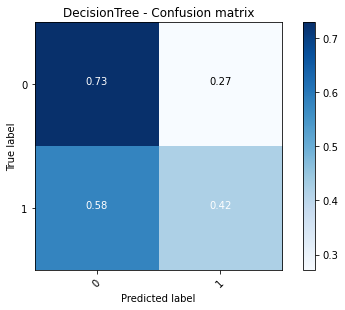

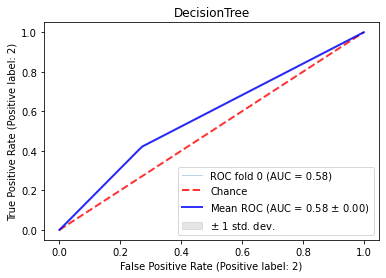

Model GaussianProcess
              precision    recall  f1-score   support

           1       0.78      0.73      0.75       107
           2       0.36      0.42      0.39        38

    accuracy                           0.65       145
   macro avg       0.57      0.58      0.57       145
weighted avg       0.67      0.65      0.66       145

Metrics
TPR 0.42105263157894735
FPR 0.27102803738317754
FAR 0.6444444444444445
TNR 0.7289719626168224
PPV 0.35555555555555557
NPV 0.78
FNR 0.5789473684210527
ACC 0.6482758620689655
Advantage 0.1500245941957698
PLR 1.5535390199637025
NLR 0.7941970310391364
OR 1.9561128526645766
Normalized confusion matrix


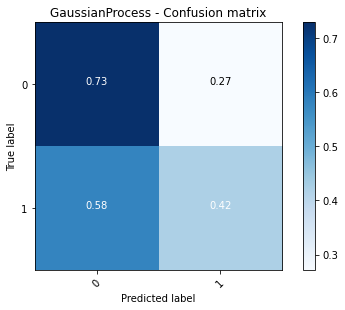

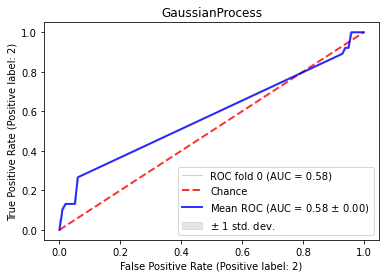

Model MLP
              precision    recall  f1-score   support

           1       0.76      0.90      0.82       107
           2       0.42      0.21      0.28        38

    accuracy                           0.72       145
   macro avg       0.59      0.55      0.55       145
weighted avg       0.67      0.72      0.68       145

Metrics
TPR 0.21052631578947367
FPR 0.102803738317757
FAR 0.5789473684210527
TNR 0.897196261682243
PPV 0.42105263157894735
NPV 0.7619047619047619
FNR 0.7894736842105263
ACC 0.7172413793103448
Advantage 0.10772257747171667
PLR 2.047846889952153
NLR 0.8799342105263158
OR 2.327272727272727
Normalized confusion matrix


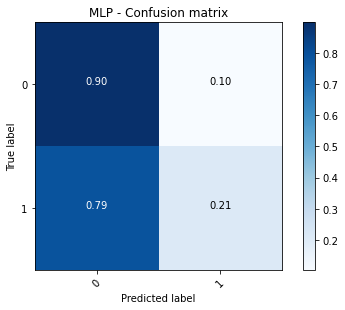

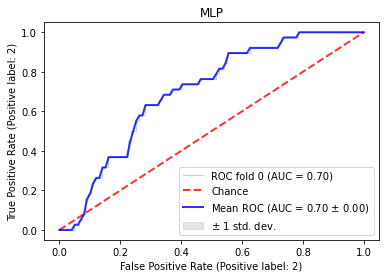

Model KN
              precision    recall  f1-score   support

           1       0.77      0.83      0.80       107
           2       0.38      0.29      0.33        38

    accuracy                           0.69       145
   macro avg       0.57      0.56      0.56       145
weighted avg       0.67      0.69      0.68       145

Metrics
TPR 0.2894736842105263
FPR 0.16822429906542055
FAR 0.6206896551724138
TNR 0.8317757009345794
PPV 0.3793103448275862
NPV 0.7672413793103449
FNR 0.7105263157894737
ACC 0.6896551724137931
Advantage 0.12124938514510578
PLR 1.7207602339181287
NLR 0.8542282672974572
OR 2.01440329218107
Normalized confusion matrix


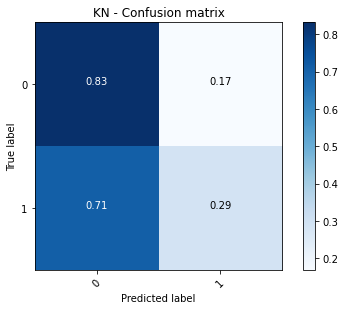

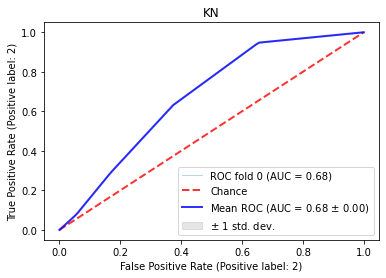

Model SVM
              precision    recall  f1-score   support

           1       0.74      1.00      0.85       107
           2       0.00      0.00      0.00        38

    accuracy                           0.74       145
   macro avg       0.37      0.50      0.42       145
weighted avg       0.54      0.74      0.63       145

Metrics
TPR 0.0
FPR 0.0
FAR nan
TNR 1.0
PPV nan
NPV 0.7379310344827587
FNR 1.0
ACC 0.7379310344827587
Advantage 0.0
PLR nan
NLR 1.0
OR nan
Normalized confusion matrix


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks

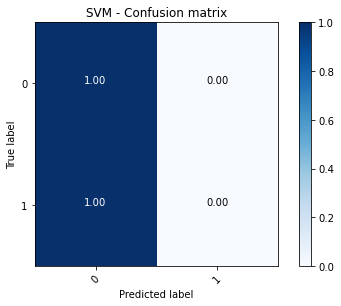

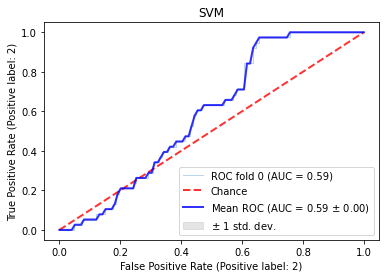

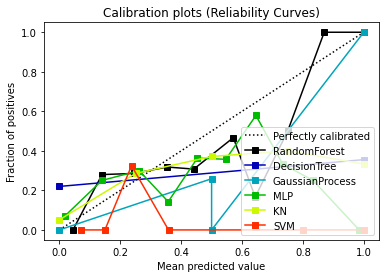

In [14]:
m_names = []
m_proba = []
for name, model in trained_models.items():
    print('Model', name)
    proba, metrics = calculate_metrics_plots(model, name, X_test, y_test, 'target_model')
    model_metrics['Model '+name] = metrics
    m_proba.append(proba)
    m_names.append(name)
plot_calibration_curve(y_test, m_names, m_proba)

# Memebership inference attack

## Worst case scenario

This attack makes the assumption that the attacker has access to the actual training and test data. It is not a realistic attack model _but_ demonstrates whether or not the model is _intrinsically_ problematic.

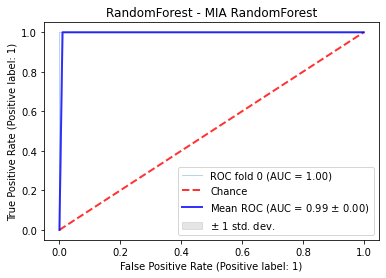

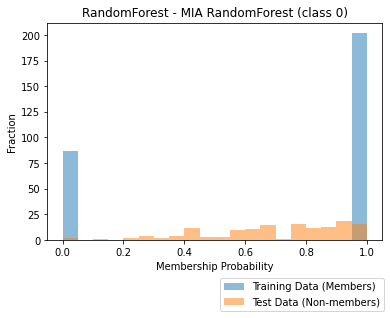

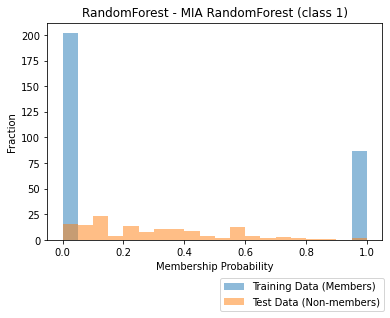

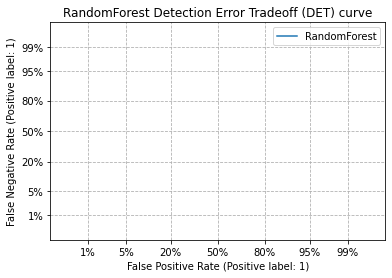

Metrics
TPR 1.0
FPR 0.0
FAR 0.0
TNR 1.0
PPV 1.0
NPV 1.0
FNR 0.0
ACC 1.0
Advantage 1.0
PLR inf
NLR 0.0
OR inf
AUC 0.994949494949495


/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:253: RuntimeWarning: divide by zero encountered in double_scalars
  metrics['PLR'] = metrics['TPR'] / metrics['FPR'] #positive likelihood ratio


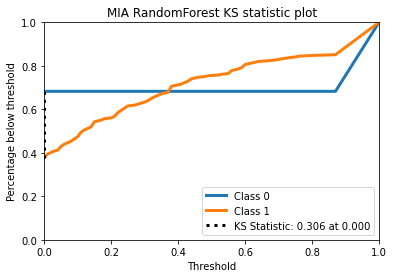

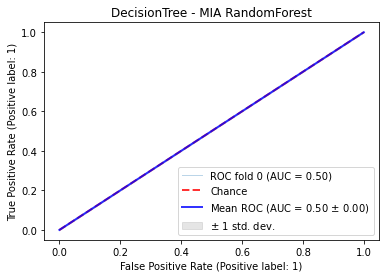

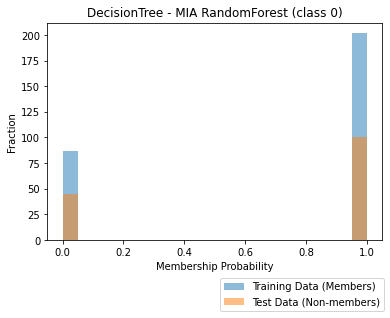

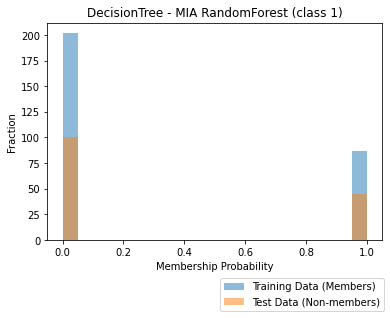

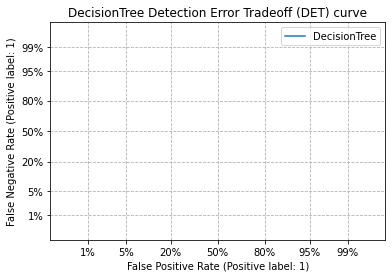

Metrics
TPR 1.0
FPR 1.0
FAR 0.3333333333333333
TNR 0.0
PPV 0.6666666666666666
NPV nan
FNR 0.0
ACC 0.6666666666666666
Advantage 0.0
PLR 1.0
NLR nan
OR nan
AUC 0.5


/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:249: RuntimeWarning: invalid value encountered in long_scalars
  metrics['NPV'] = tn / (tn + fn) #negative predictive value
/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:254: RuntimeWarning: invalid value encountered in double_scalars
  metrics['NLR'] = metrics['FNR'] / metrics['TNR'] #negative likelihood ratio


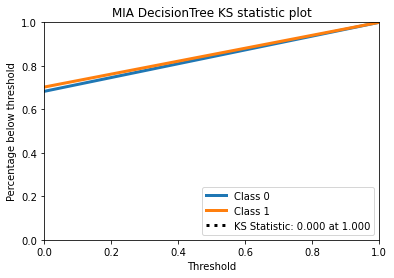

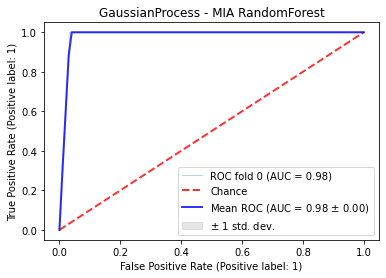

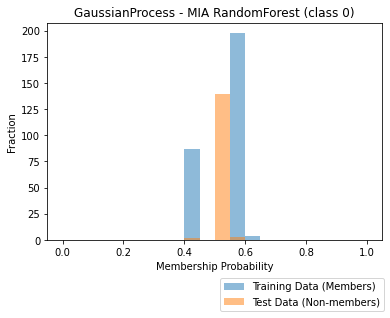

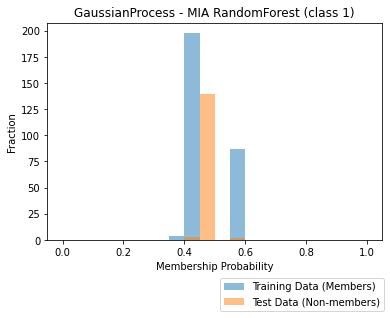

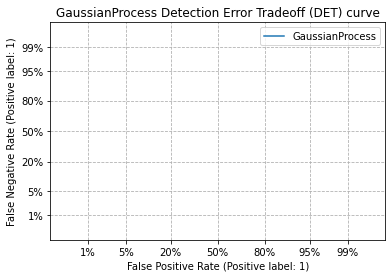

Metrics
TPR 1.0
FPR 0.034482758620689655
FAR 0.01694915254237288
TNR 0.9655172413793104
PPV 0.9830508474576272
NPV 1.0
FNR 0.0
ACC 0.9885057471264368
Advantage 0.9655172413793104
PLR 29.0
NLR 0.0
OR inf
AUC 0.9826161299515532


/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  metrics['OR'] = metrics['PLR'] / metrics['NLR'] #odds ratio, the odds ratio is used to find the probability of an outcome of an event when there are two possible outcomes


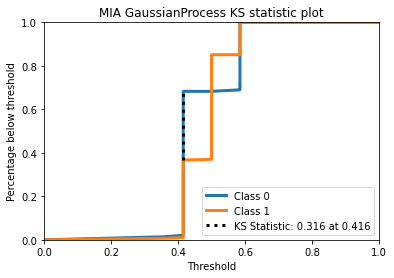

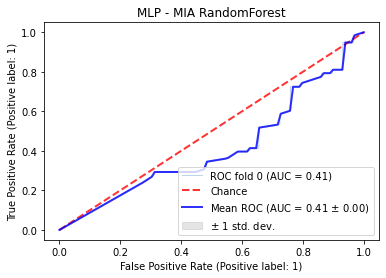

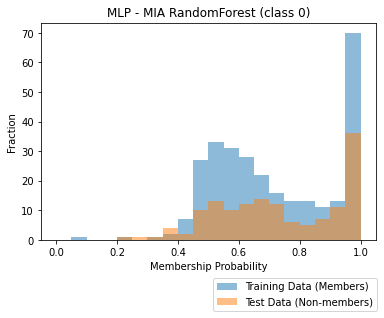

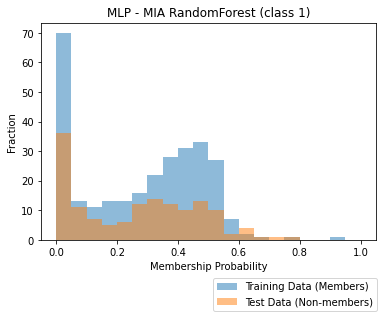

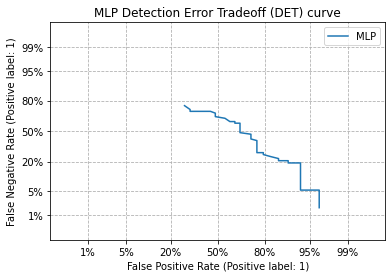

Metrics
TPR 0.7068965517241379
FPR 0.7586206896551724
FAR 0.3492063492063492
TNR 0.2413793103448276
PPV 0.6507936507936508
NPV 0.2916666666666667
FNR 0.29310344827586204
ACC 0.5517241379310345
Advantage 0.051724137931034475
PLR 0.9318181818181819
NLR 1.2142857142857142
OR 0.7673796791443851
AUC 0.41441672032058646


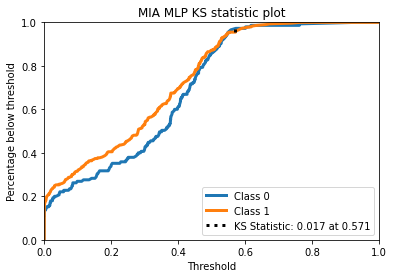

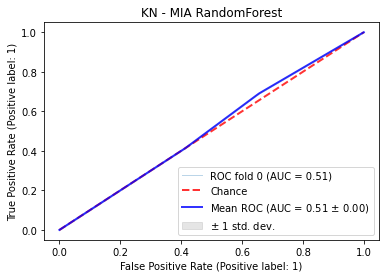

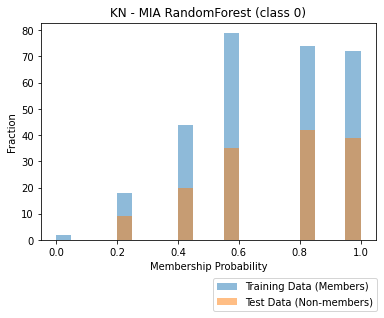

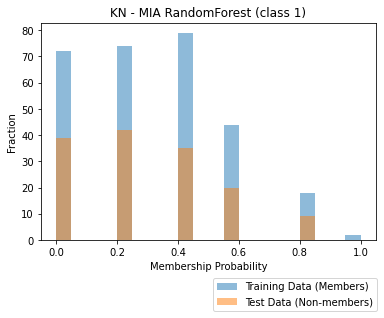

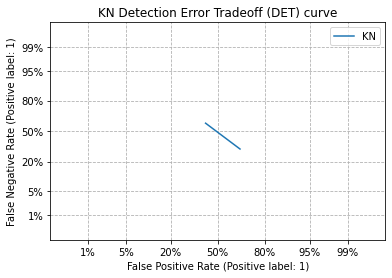

Metrics
TPR 1.0
FPR 1.0
FAR 0.3333333333333333
TNR 0.0
PPV 0.6666666666666666
NPV nan
FNR 0.0
ACC 0.6666666666666666
Advantage 0.0
PLR 1.0
NLR nan
OR nan
AUC 0.5101057849229218


/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:249: RuntimeWarning: invalid value encountered in long_scalars
  metrics['NPV'] = tn / (tn + fn) #negative predictive value
/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:254: RuntimeWarning: invalid value encountered in double_scalars
  metrics['NLR'] = metrics['FNR'] / metrics['TNR'] #negative likelihood ratio


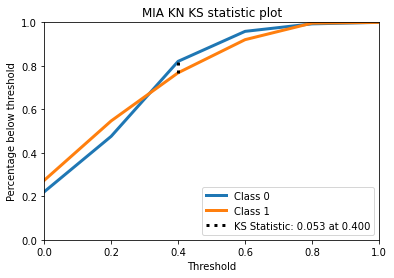

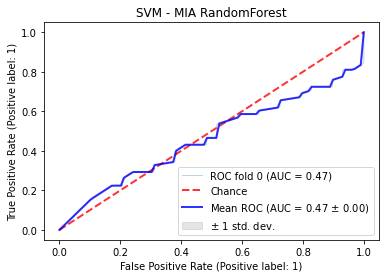

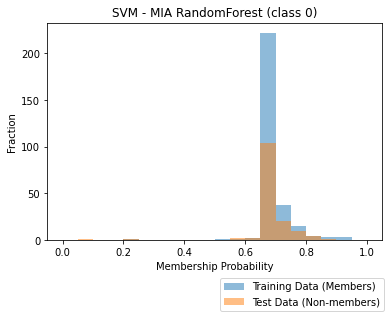

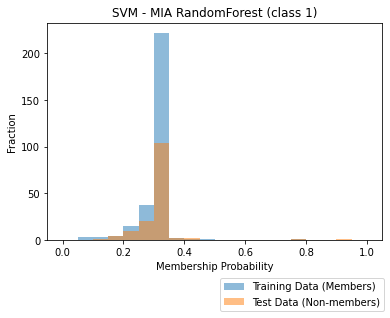

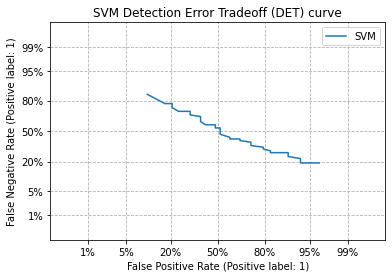

Metrics
TPR 0.603448275862069
FPR 0.6551724137931034
FAR 0.35185185185185186
TNR 0.3448275862068966
PPV 0.6481481481481481
NPV 0.30303030303030304
FNR 0.39655172413793105
ACC 0.5172413793103449
Advantage 0.051724137931034475
PLR 0.9210526315789473
NLR 1.15
OR 0.8009153318077804
AUC 0.46613294209950423


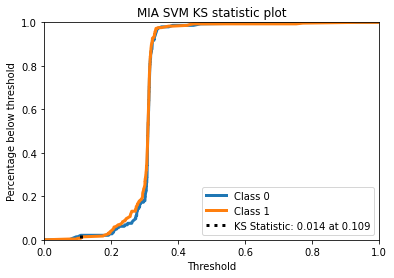

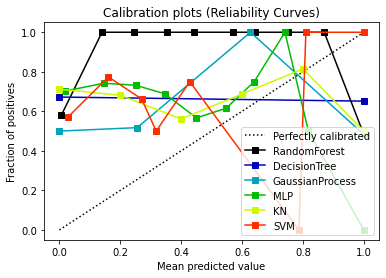

In [15]:
shadow_names = []
shadow_proba = []
for name, model in trained_models.items():
    mia_name = 'RandomForest'
    proba, y_labels, metrics = mia_worst_case(name, model, X_target_train, X_test)
    model_metrics['WorstCase '+name] = metrics
    shadow_names.append(name)
    shadow_proba.append(np.concatenate(proba))
plot_calibration_curve(y_labels, shadow_names, shadow_proba)

# Salem adversary attacks

## Salem adversary 1

This attack assumes attacker has a dataset of the same distribution as the target's model tarining data.

The shadow model mimic the target's model behaviour.

Target model RandomForest


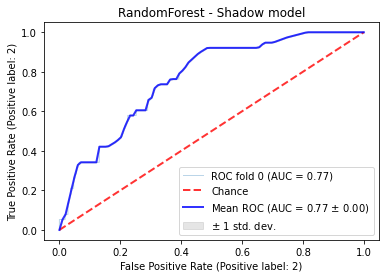

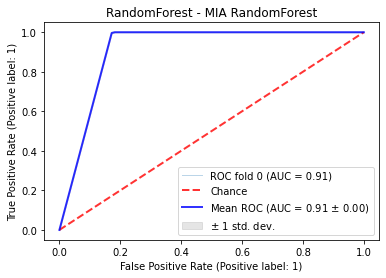

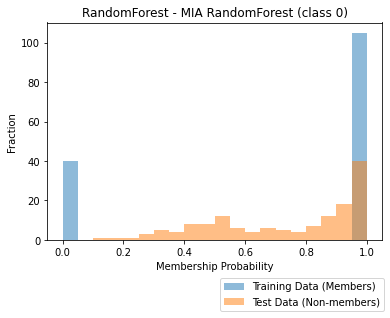

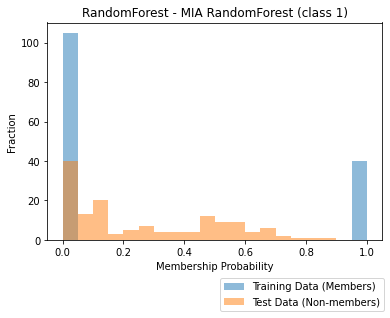

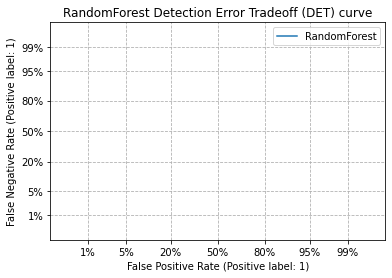

Metrics
TPR 1.0
FPR 0.1724137931034483
FAR 0.14705882352941177
TNR 0.8275862068965517
PPV 0.8529411764705882
NPV 1.0
FNR 0.0
ACC 0.9137931034482759
Advantage 0.8275862068965517
PLR 5.8
NLR 0.0
OR inf
AUC 0.9137741046831955


/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  metrics['OR'] = metrics['PLR'] / metrics['NLR'] #odds ratio, the odds ratio is used to find the probability of an outcome of an event when there are two possible outcomes


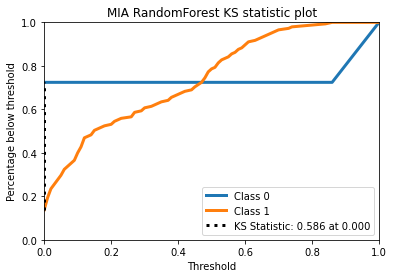

Target model DecisionTree


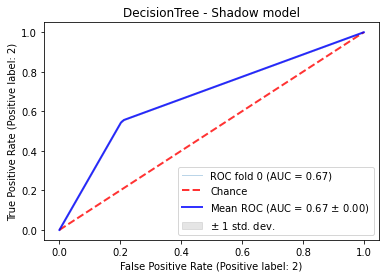

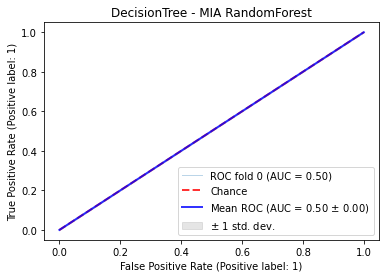

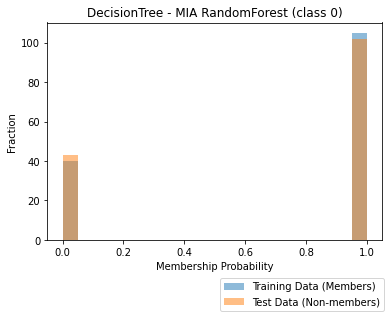

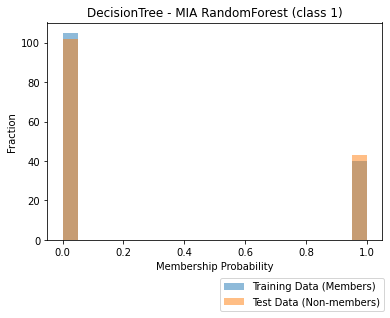

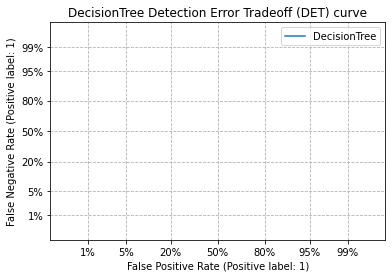

Metrics
TPR 1.0
FPR 1.0
FAR 0.5
TNR 0.0
PPV 0.5
NPV nan
FNR 0.0
ACC 0.5
Advantage 0.0
PLR 1.0
NLR nan
OR nan
AUC 0.5


/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:249: RuntimeWarning: invalid value encountered in long_scalars
  metrics['NPV'] = tn / (tn + fn) #negative predictive value
/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:254: RuntimeWarning: invalid value encountered in double_scalars
  metrics['NLR'] = metrics['FNR'] / metrics['TNR'] #negative likelihood ratio


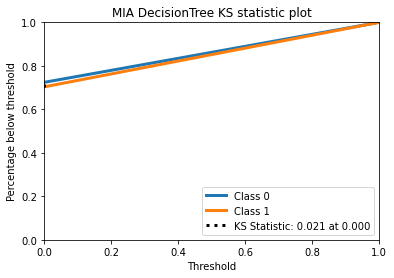

Target model GaussianProcess


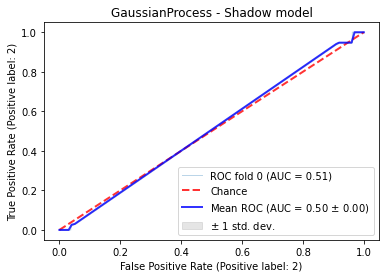

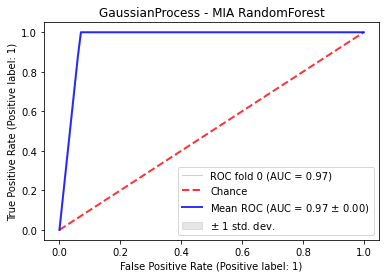

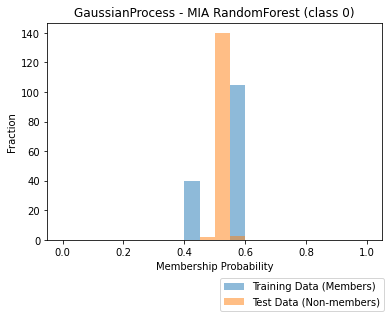

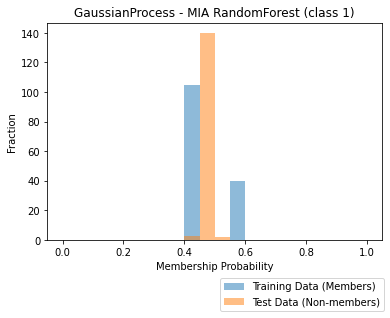

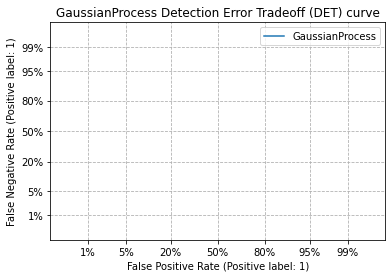

Metrics
TPR 1.0
FPR 0.06896551724137931
FAR 0.06451612903225806
TNR 0.9310344827586207
PPV 0.9354838709677419
NPV 1.0
FNR 0.0
ACC 0.9655172413793104
Advantage 0.9310344827586207
PLR 14.5
NLR 0.0
OR inf
AUC 0.9654116926844201


/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  metrics['OR'] = metrics['PLR'] / metrics['NLR'] #odds ratio, the odds ratio is used to find the probability of an outcome of an event when there are two possible outcomes


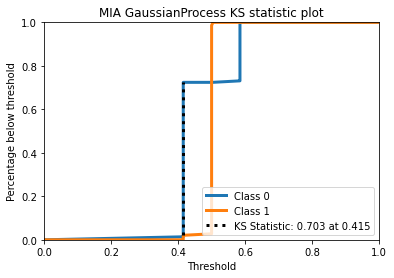

Target model MLP


/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:246: RuntimeWarning: invalid value encountered in long_scalars
  metrics['FAR'] = fp / (fp + tp) #proportion of things classified as positives that are incorrect, also known as false discovery rate
/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:248: RuntimeWarning: invalid value encountered in long_scalars
  metrics['PPV'] = tp / (tp + fp) #precision or positive predictive value
/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:253: RuntimeWarning: invalid value encountered in double_scalars
  metrics['PLR'] = metrics['TPR'] / metrics['FPR'] #positive likelihood ratio


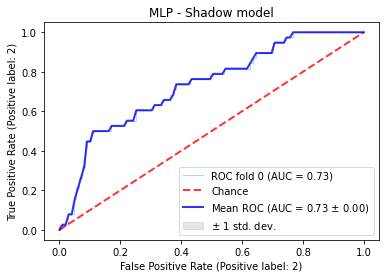

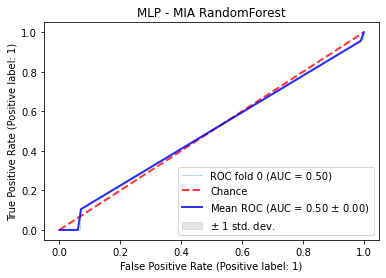

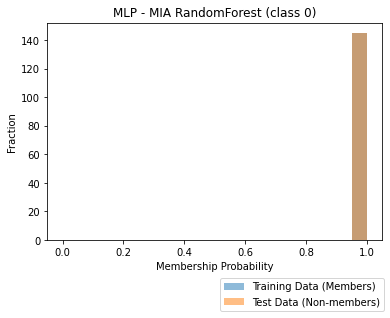

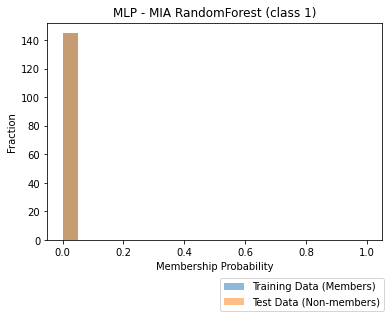

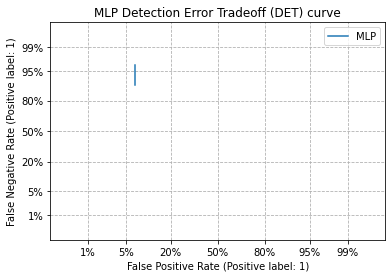

Metrics
TPR 0.9655172413793104
FPR 1.0
FAR 0.5087719298245614
TNR 0.0
PPV 0.49122807017543857
NPV 0.0
FNR 0.034482758620689655
ACC 0.4827586206896552
Advantage 0.03448275862068961
PLR 0.9655172413793104
NLR inf
OR 0.0
AUC 0.4981450794175745


/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:254: RuntimeWarning: divide by zero encountered in double_scalars
  metrics['NLR'] = metrics['FNR'] / metrics['TNR'] #negative likelihood ratio


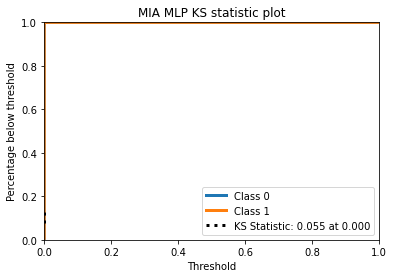

Target model KN


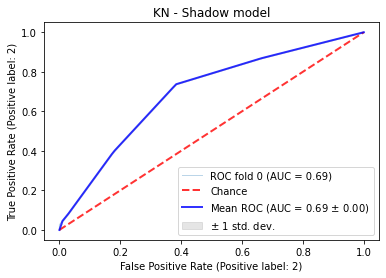

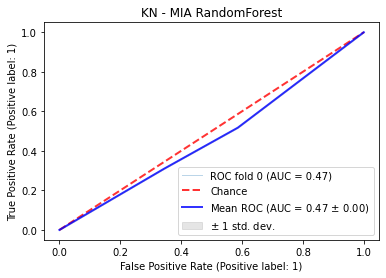

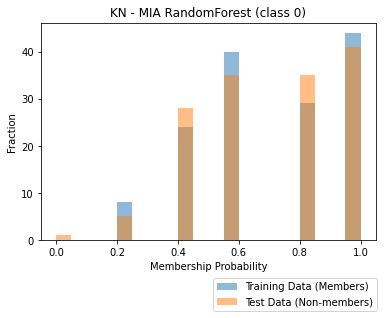

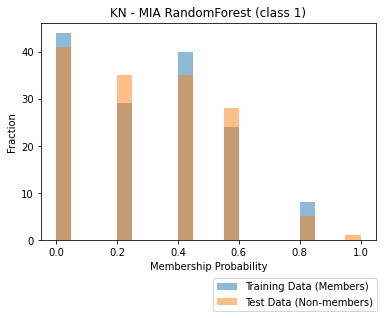

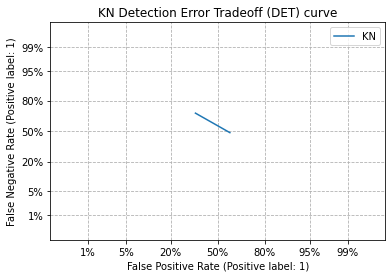

Metrics
TPR 0.3103448275862069
FPR 0.3448275862068966
FAR 0.5263157894736842
TNR 0.6551724137931034
PPV 0.47368421052631576
NPV 0.48717948717948717
FNR 0.6896551724137931
ACC 0.4827586206896552
Advantage 0.03448275862068967
PLR 0.9
NLR 1.0526315789473686
OR 0.8549999999999999
AUC 0.4673010980917634


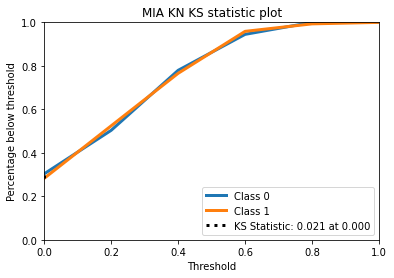

Target model SVM


/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:246: RuntimeWarning: invalid value encountered in long_scalars
  metrics['FAR'] = fp / (fp + tp) #proportion of things classified as positives that are incorrect, also known as false discovery rate
/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:248: RuntimeWarning: invalid value encountered in long_scalars
  metrics['PPV'] = tp / (tp + fp) #precision or positive predictive value
/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:253: RuntimeWarning: invalid value encountered in double_scalars
  metrics['PLR'] = metrics['TPR'] / metrics['FPR'] #positive likelihood ratio


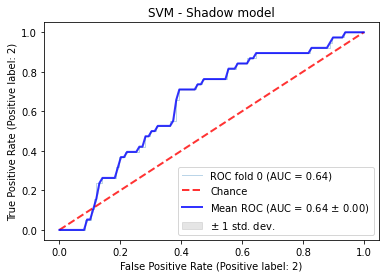

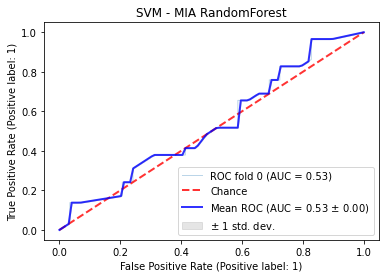

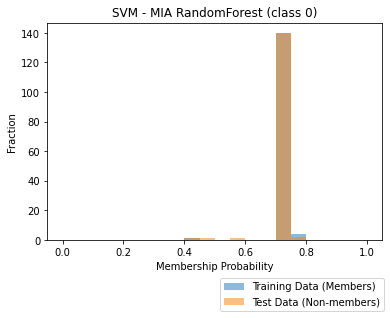

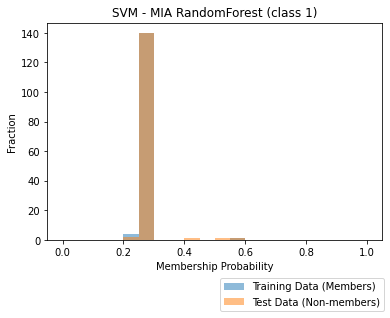

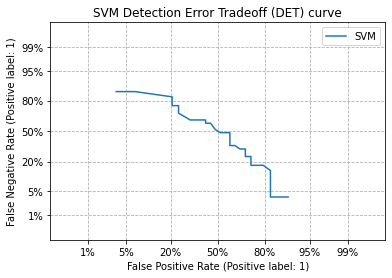

Metrics
TPR 0.5172413793103449
FPR 0.5862068965517241
FAR 0.53125
TNR 0.41379310344827586
PPV 0.46875
NPV 0.46153846153846156
FNR 0.4827586206896552
ACC 0.46551724137931033
Advantage 0.06896551724137923
PLR 0.8823529411764707
NLR 1.1666666666666667
OR 0.7563025210084033
AUC 0.5310368869233376


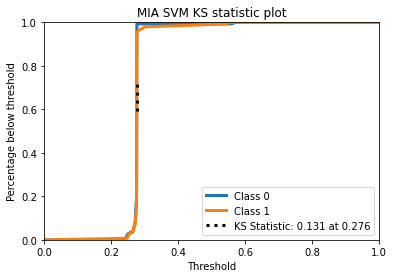

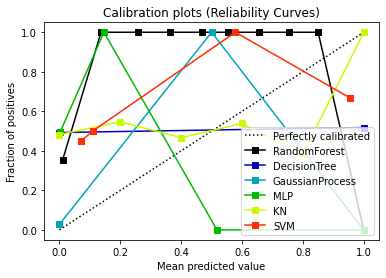

In [16]:
shadow_names = []
shadow_proba = []
for name, target_model in trained_models.items():
    print('Target model', name)
    
    shadow_model_metrics,proba, y_labels, mia_metrics = mia_salem_1(classifiers[name],
                                          name,
                                          X_shadow_train,
                                          y_shadow_train,
                                          X_test,
                                          y_test)
    model_metrics['Salem1 shadow '+name] = shadow_model_metrics
    model_metrics['Salem1 MIA '+name] = mia_metrics
    shadow_names.append(name)
    shadow_proba.append(np.concatenate(proba))
plot_calibration_curve(y_labels, shadow_names, shadow_proba)

# Salem adversary 2 - Combining attack

The attacker does not have data coming from the same distribution as the target model’s training data.

The adversary does not know the structure of the target mode.

To improve the attack with no knowledge of the target model, a set of ML models are constructed (sub-shadow model), each with a different classification algorithm. The "combining attack" can learn the behavior of the different classifiers and therefore can attack an unknown target model based on the assumption that there is a sub-shadow model which is trained with the same classifier as the target model.

model RandomForest


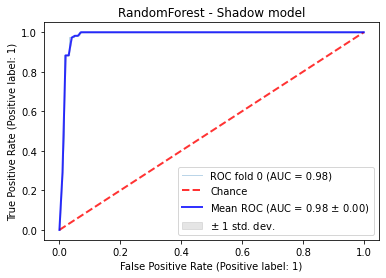

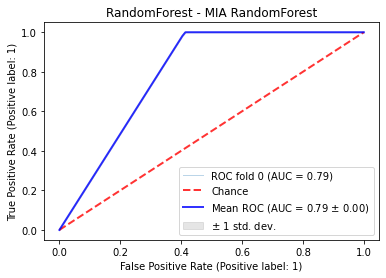

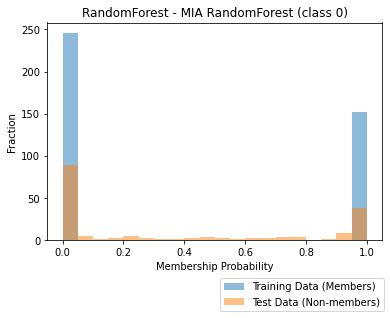

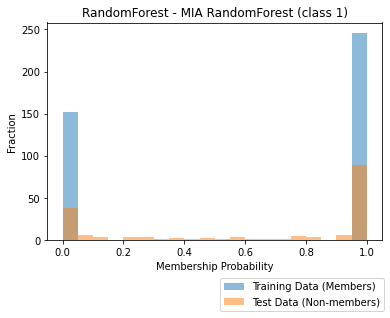

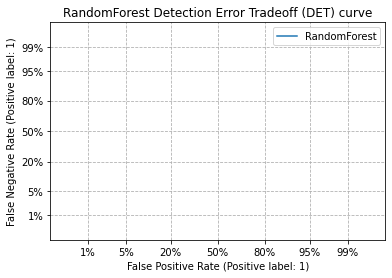

Metrics
TPR 1.0
FPR 0.4117647058823529
FAR 0.14893617021276595
TNR 0.5882352941176471
PPV 0.851063829787234
NPV 1.0
FNR 0.0
ACC 0.8771929824561403
Advantage 0.5882352941176471
PLR 2.428571428571429
NLR 0.0
OR inf
AUC 0.7940953547014153


/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  metrics['OR'] = metrics['PLR'] / metrics['NLR'] #odds ratio, the odds ratio is used to find the probability of an outcome of an event when there are two possible outcomes


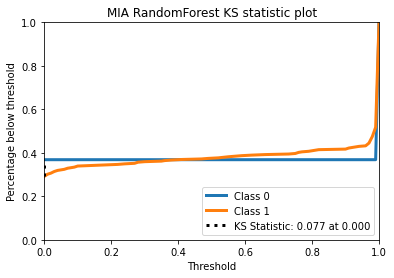

model DecisionTree


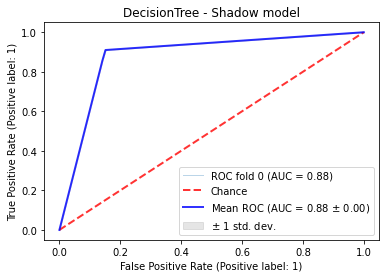

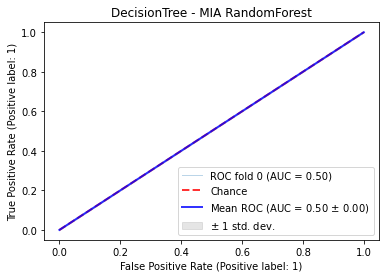

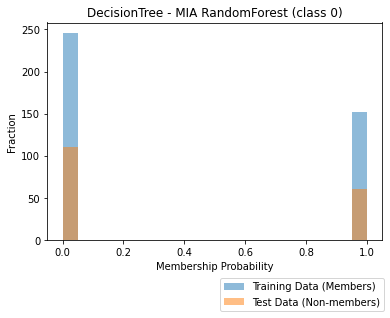

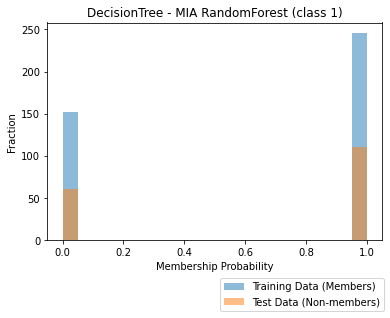

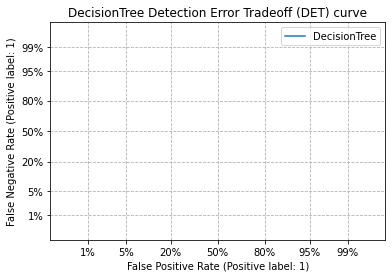

Metrics
TPR 1.0
FPR 1.0
FAR 0.2982456140350877
TNR 0.0
PPV 0.7017543859649122
NPV nan
FNR 0.0
ACC 0.7017543859649122
Advantage 0.0
PLR 1.0
NLR nan
OR nan
AUC 0.5


/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:249: RuntimeWarning: invalid value encountered in long_scalars
  metrics['NPV'] = tn / (tn + fn) #negative predictive value
/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:254: RuntimeWarning: invalid value encountered in double_scalars
  metrics['NLR'] = metrics['FNR'] / metrics['TNR'] #negative likelihood ratio


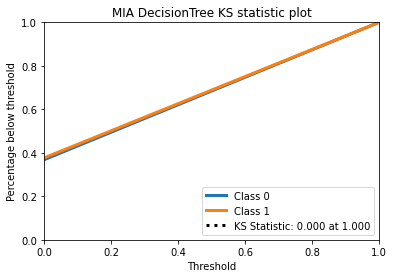

model GaussianProcess


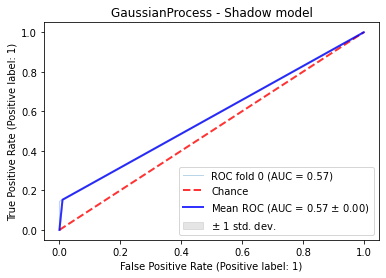

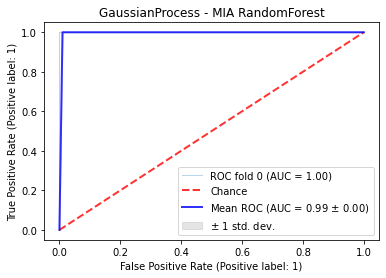

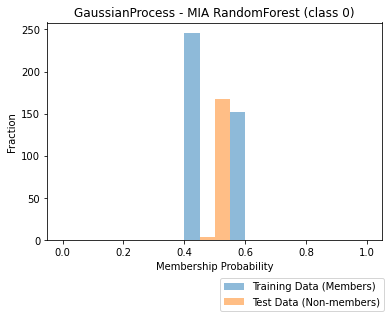

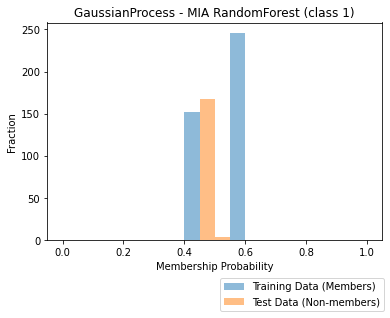

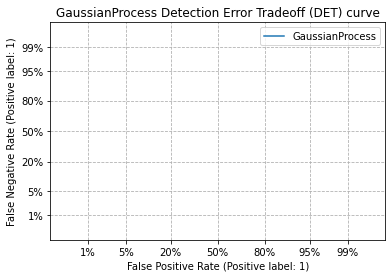

Metrics
TPR 1.0
FPR 0.0
FAR 0.0
TNR 1.0
PPV 1.0
NPV 1.0
FNR 0.0
ACC 1.0
Advantage 1.0
PLR inf
NLR 0.0
OR inf
AUC 0.994949494949495


/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:253: RuntimeWarning: divide by zero encountered in double_scalars
  metrics['PLR'] = metrics['TPR'] / metrics['FPR'] #positive likelihood ratio


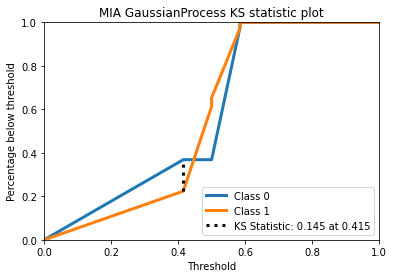

model MLP


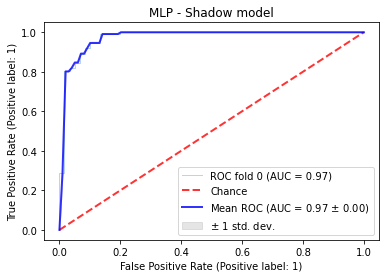

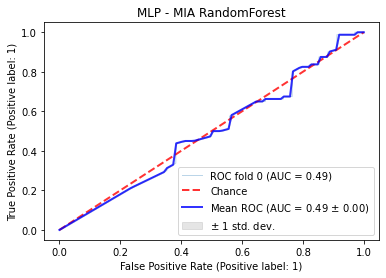

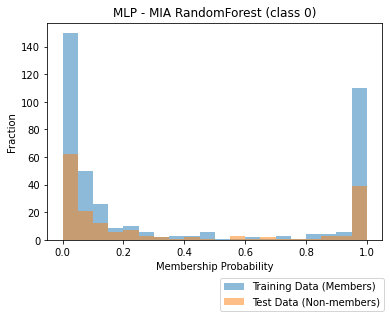

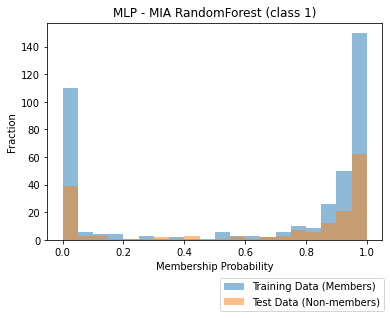

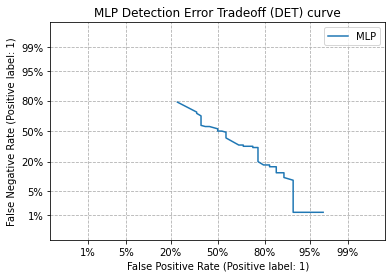

Metrics
TPR 0.7375
FPR 0.7647058823529411
FAR 0.3058823529411765
TNR 0.23529411764705882
PPV 0.6941176470588235
NPV 0.27586206896551724
FNR 0.2625
ACC 0.5877192982456141
Advantage 0.02720588235294108
PLR 0.964423076923077
NLR 1.115625
OR 0.8644688644688645
AUC 0.49283300173451683


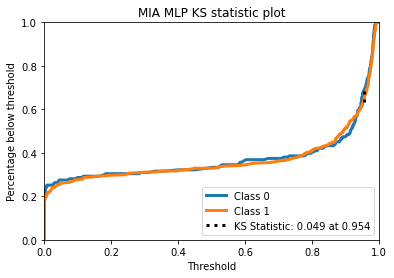

model KN


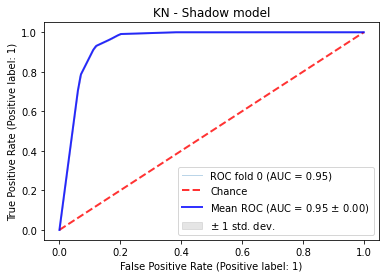

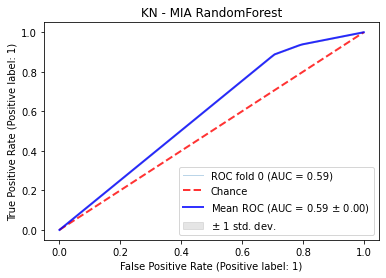

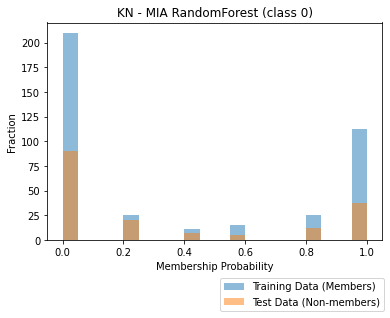

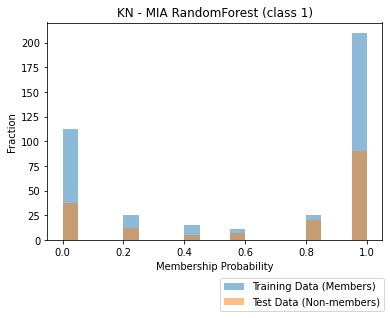

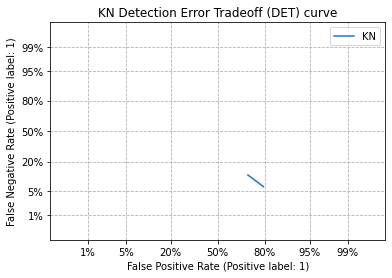

Metrics
TPR 1.0
FPR 1.0
FAR 0.2982456140350877
TNR 0.0
PPV 0.7017543859649122
NPV nan
FNR 0.0
ACC 0.7017543859649122
Advantage 0.0
PLR 1.0
NLR nan
OR nan
AUC 0.5931917023773083


/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:249: RuntimeWarning: invalid value encountered in long_scalars
  metrics['NPV'] = tn / (tn + fn) #negative predictive value
/home/alba/Documents/HIC_Dundee/GRAIMAtter/GRAIMatter/WP1/notebooks/attack_scenarios.py:254: RuntimeWarning: invalid value encountered in double_scalars
  metrics['NLR'] = metrics['FNR'] / metrics['TNR'] #negative likelihood ratio


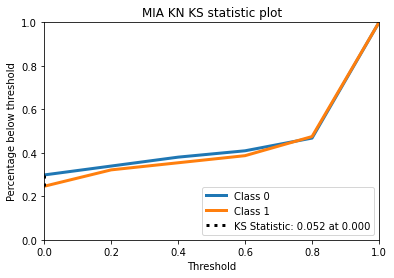

model SVM


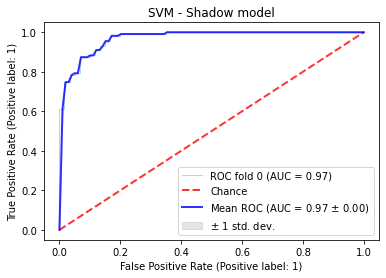

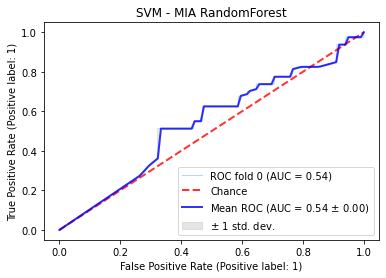

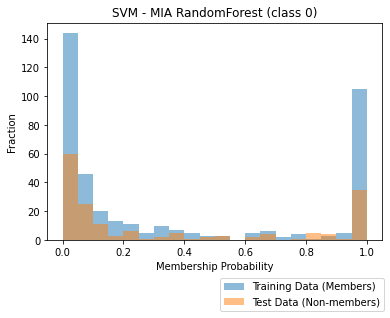

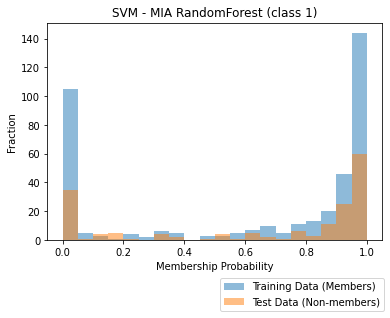

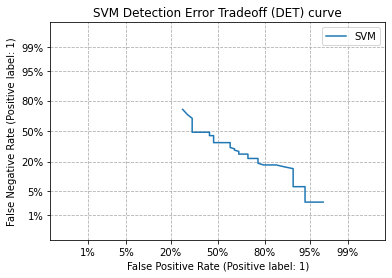

Metrics
TPR 0.725
FPR 0.6470588235294118
FAR 0.275
TNR 0.35294117647058826
PPV 0.725
NPV 0.35294117647058826
FNR 0.275
ACC 0.6140350877192983
Advantage 0.07794117647058818
PLR 1.1204545454545454
NLR 0.7791666666666667
OR 1.4380165289256197
AUC 0.5410659626568717


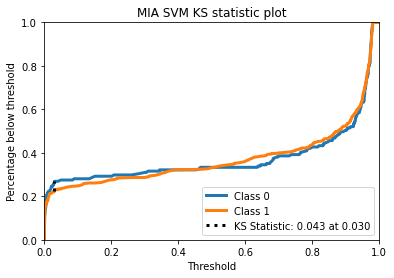

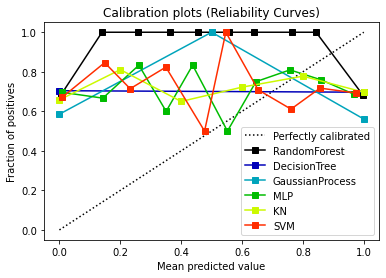

In [18]:
sub_shadow_names = []
sub_shadow_proba = []
for name, target_model in trained_models.items():
    print('model', name)
    
    #Salem2 is trained by default with a breast cancer dataset provided by sklern datasets.
    shdow_metrics, proba, y_labels, metrics = mia_salem_2(classifiers[name], name)
    model_metrics['Salem2 shadow '+name] = metrics
    model_metrics['Salem2 MIA '+name] = metrics
    sub_shadow_names.append(name)
    sub_shadow_proba.append(np.concatenate(proba))
plot_calibration_curve(y_labels, sub_shadow_names, sub_shadow_proba)

In [19]:
model_metrics

{'Model RandomForest': {'TPR': 0.3684210526315789,
  'FPR': 0.14953271028037382,
  'FAR': 0.5333333333333333,
  'TNR': 0.8504672897196262,
  'PPV': 0.4666666666666667,
  'NPV': 0.7913043478260869,
  'FNR': 0.631578947368421,
  'ACC': 0.7241379310344828,
  'Advantage': 0.2188883423512051,
  'PLR': 2.463815789473684,
  'NLR': 0.7426257952573742,
  'OR': 3.3177083333333335,
  'AUC': 0.7271118951342237},
 'Model DecisionTree': {'TPR': 0.42105263157894735,
  'FPR': 0.27102803738317754,
  'FAR': 0.6444444444444445,
  'TNR': 0.7289719626168224,
  'PPV': 0.35555555555555557,
  'NPV': 0.78,
  'FNR': 0.5789473684210527,
  'ACC': 0.6482758620689655,
  'Advantage': 0.1500245941957698,
  'PLR': 1.5535390199637025,
  'NLR': 0.7941970310391364,
  'OR': 1.9561128526645766,
  'AUC': 0.5750068766897674},
 'Model GaussianProcess': {'TPR': 0.42105263157894735,
  'FPR': 0.27102803738317754,
  'FAR': 0.6444444444444445,
  'TNR': 0.7289719626168224,
  'PPV': 0.35555555555555557,
  'NPV': 0.78,
  'FNR': 0.578

In [20]:
df = pd.DataFrame.from_dict(model_metrics).T

In [21]:
df['model'] = [idx.split()[-1] for idx in df.index]
df['type'] = [idx.split()[-2] if len(idx.split())>1 else 'model' for idx in df.index]
df['scenario'] = [idx.split()[-3] if len(idx.split())>2 else 'model' for idx in df.index]

In [22]:
df

,TPR,FPR,FAR,TNR,PPV,NPV,FNR,ACC,Advantage,PLR,NLR,OR,AUC,model,type,scenario
Model RandomForest,0.368421,0.149533,0.533333,0.850467,0.466667,0.791304,0.631579,0.724138,0.218888,2.463816,0.742626,3.317708,0.727112,RandomForest,Model,model
Model DecisionTree,0.421053,0.271028,0.644444,0.728972,0.355556,0.780000,0.578947,0.648276,0.150025,1.553539,0.794197,1.956113,0.575007,DecisionTree,Model,model
Model GaussianProcess,0.421053,0.271028,0.644444,0.728972,0.355556,0.780000,0.578947,0.648276,0.150025,1.553539,0.794197,1.956113,0.578975,GaussianProcess,Model,model
Model MLP,0.210526,0.102804,0.578947,0.897196,0.421053,0.761905,0.789474,0.717241,0.107723,2.047847,0.879934,2.327273,0.701489,MLP,Model,model
Model KN,0.289474,0.168224,0.620690,0.831776,0.379310,0.767241,0.710526,0.689655,0.121249,1.720760,0.854228,2.014403,0.675597,KN,Model,model
Model SVM,0.000000,0.000000,NaN,1.000000,NaN,0.737931,1.000000,0.737931,0.000000,NaN,1.000000,NaN,0.586922,SVM,Model,model
WorstCase RandomForest,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,inf,0.000000,inf,0.994949,RandomForest,WorstCase,model
WorstCase DecisionTree,1.000000,1.000000,0.333333,0.000000,0.666667,NaN,0.000000,0.666667,0.000000,1.000000,NaN,NaN,0.500000,DecisionTree,WorstCase,model
WorstCase GaussianProcess,1.000000,0.034483,0.016949,0.965517,0.983051,1.000000,0.000000,0.988506,0.965517,29.000000,0.000000,inf,0.982616,GaussianProcess,WorstCase,model
WorstCase MLP,0.706897,0.758621,0.349206,0.241379,0.650794,0.291667,0.293103,0.551724,0.051724,0.931818,1.214286,0.767380,0.414417,MLP,WorstCase,model


In [23]:
df = df.groupby(['model', 'scenario', 'type',]).mean().reset_index()
df = df.round(4)
df

,model,scenario,type,TPR,FPR,FAR,TNR,PPV,NPV,FNR,ACC,Advantage,PLR,NLR,OR,AUC
0,DecisionTree,Salem1,MIA,1.0000,1.0000,0.5000,0.0000,0.5000,NaN,0.0000,0.5000,0.0000,1.0000,NaN,NaN,0.5000
1,DecisionTree,Salem1,shadow,0.5526,0.2056,0.5116,0.7944,0.4884,0.8333,0.4474,0.7310,0.3470,2.6878,0.5632,4.7727,0.6735
2,DecisionTree,Salem2,MIA,1.0000,1.0000,0.2982,0.0000,0.7018,NaN,0.0000,0.7018,0.0000,1.0000,NaN,NaN,0.5000
3,DecisionTree,Salem2,shadow,1.0000,1.0000,0.2982,0.0000,0.7018,NaN,0.0000,0.7018,0.0000,1.0000,NaN,NaN,0.5000
4,DecisionTree,model,Model,0.4211,0.2710,0.6444,0.7290,0.3556,0.7800,0.5789,0.6483,0.1500,1.5535,0.7942,1.9561,0.5750
5,DecisionTree,model,WorstCase,1.0000,1.0000,0.3333,0.0000,0.6667,NaN,0.0000,0.6667,0.0000,1.0000,NaN,NaN,0.5000
6,GaussianProcess,Salem1,MIA,1.0000,0.0690,0.0645,0.9310,0.9355,1.0000,0.0000,0.9655,0.9310,14.5000,0.0000,inf,0.9654
7,GaussianProcess,Salem1,shadow,0.3684,0.1869,0.5882,0.8131,0.4118,0.7838,0.6316,0.6966,0.1815,1.9711,0.7768,2.5375,0.5050
8,GaussianProcess,Salem2,MIA,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,inf,0.0000,inf,0.9949
9,GaussianProcess,Salem2,shadow,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,inf,0.0000,inf,0.9949


In [24]:
#format table for readme.md 
table = '| ' 
table += " | ".join(list(df.columns))+" |\n|" +" | ".join(['-'*len(x) for x in list(df.columns)])#+" |\n"
table

for i, row in df.iterrows():
    table += " |\n"
    for j, column in row.iteritems():
        table += " | "+str(column)
table += " |"
print(table)


| model | scenario | type | TPR | FPR | FAR | TNR | PPV | NPV | FNR | ACC | Advantage | PLR | NLR | OR | AUC |
|----- | -------- | ---- | --- | --- | --- | --- | --- | --- | --- | --- | --------- | --- | --- | -- | --- |
 | DecisionTree | Salem1 | MIA | 1.0 | 1.0 | 0.5 | 0.0 | 0.5 | nan | 0.0 | 0.5 | 0.0 | 1.0 | nan | nan | 0.5 |
 | DecisionTree | Salem1 | shadow | 0.5526 | 0.2056 | 0.5116 | 0.7944 | 0.4884 | 0.8333 | 0.4474 | 0.731 | 0.347 | 2.6878 | 0.5632 | 4.7727 | 0.6735 |
 | DecisionTree | Salem2 | MIA | 1.0 | 1.0 | 0.2982 | 0.0 | 0.7018 | nan | 0.0 | 0.7018 | 0.0 | 1.0 | nan | nan | 0.5 |
 | DecisionTree | Salem2 | shadow | 1.0 | 1.0 | 0.2982 | 0.0 | 0.7018 | nan | 0.0 | 0.7018 | 0.0 | 1.0 | nan | nan | 0.5 |
 | DecisionTree | model | Model | 0.4211 | 0.271 | 0.6444 | 0.729 | 0.3556 | 0.78 | 0.5789 | 0.6483 | 0.15 | 1.5535 | 0.7942 | 1.9561 | 0.575 |
 | DecisionTree | model | WorstCase | 1.0 | 1.0 | 0.3333 | 0.0 | 0.6667 | nan | 0.0 | 0.6667 | 0.0 | 1.0 | nan | nan | 0.5 |
 | Ga